        ┌──────┐┌──────────┐┌──────────┐   
  qd_0: ┤0     ├┤0         ├┤0         ├───
        │      ││          ││          │   
  qd_1: ┤1 QFT ├┤1 BARRIER ├┤1         ├───
        │      ││          ││          │   
  qd_2: ┤2     ├┤2         ├┤2         ├───
        └┬───┬─┘└────░─────┘│          │┌─┐
   q_0: ─┤ H ├───────░──────┤  MEASURE ├┤M├
         └───┘       ░      │          │└╥┘
meas_0: ════════════════════╡0         ╞═╬═
                            │          │ ║ 
meas_1: ════════════════════╡1         ╞═╬═
                            │          │ ║ 
meas_2: ════════════════════╡2         ╞═╬═
                            └──────────┘ ║ 
meas_3: ═════════════════════════════════╩═
                                           
{'0000': 54, '1001': 60, '0100': 77, '1101': 64, '1011': 49, '0110': 79, '0101': 63, '0111': 53, '1100': 69, '1010': 61, '1110': 62, '0001': 64, '1111': 67, '1000': 58, '0010': 60, '0011': 60} {'0##0': 54, '1##1': 60, '0##4': 77, '1##5': 64, '1##3': 49

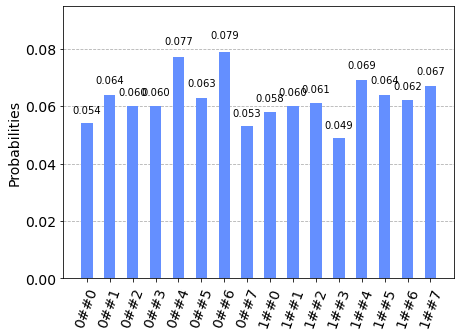

In [10]:
# This code is from Qiskit Hackathon 2021 by the team
# Qiskit for high dimensional multipartite quantum states.
#
# Author: Tim Alexis Körner
#
# (C) Copyright 2021 Hoang Van Do, Tim Alexis Körner, Inho Choi, Timothé Presles and Élie Gouzien.
#
# This code is licensed under the Apache License, Version 2.0. You may
# obtain a copy of this license in the LICENSE.txt file in the root directory
# of this source tree or at http://www.apache.org/licenses/LICENSE-2.0.
#
# Any modifications or derivative works of this code must retain this
# copyright notice, and modified files need to carry a notice indicating
# that they have been altered from the originals.

from qiskit_qudits import QuditCircuit
qdc = QuditCircuit([8], 1, 0)
qdc.qft(0)
qdc.h(0)
qdc.measure_all()

print(qdc)

from qiskit import Aer, execute
from qiskit.visualization import plot_histogram

from qiskit_qudits.visualization import counts_to_quditcounts

simulator = Aer.get_backend('qasm_simulator') #simulation part
job = execute(qdc, simulator, shots=1000)
counts = job.result().get_counts()

qd_counts = counts_to_quditcounts(qdc, counts)
print(counts, qd_counts)
plot_histogram(qd_counts)
